# PART1 : **Language Modeling / Regression**

In [36]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_csv('https://github.com/dbbrandt/short_answer_granding_capstone_project/raw/master/data/sag/answers.csv')

In [3]:
df.head()

,id,answer,score,correct
0,1.1,High risk problems are address in the prototyp...,3.5,0.0
1,1.1,To simulate portions of the desired final prod...,5.0,1.0
2,1.1,A prototype program simulates the behaviors of...,4.0,1.0
3,1.1,Defined in the Specification phase a prototype...,5.0,1.0
4,1.1,It is used to let the users have a first idea ...,3.0,0.0


## NLP pipeline :

### Text Cleaning and Preprocessing

In [4]:
def clean_text(text):
    text = text.lower()  # Lowercase text
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    return text

# Apply text cleaning
df['cleaned_text'] = df['answer'].apply(clean_text)

In [5]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\hp i7
[nltk_data]     11jin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\hp i7
[nltk_data]     11jin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\hp i7
[nltk_data]     11jin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

###  Tokenization, stop words removal, and lemmatization

In [6]:
df['tokens'] = df['cleaned_text'].apply(word_tokenize)

In [7]:
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

In [8]:
lemmatizer = WordNetLemmatizer()
df['tokens'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [9]:
df

,id,answer,score,correct,cleaned_text,tokens
0,1.1,High risk problems are address in the prototyp...,3.5,0.0,high risk problems are address in the prototyp...,"[high, risk, problem, address, prototype, prog..."
1,1.1,To simulate portions of the desired final prod...,5.0,1.0,to simulate portions of the desired final prod...,"[simulate, portion, desired, final, product, q..."
2,1.1,A prototype program simulates the behaviors of...,4.0,1.0,a prototype program simulates the behaviors of...,"[prototype, program, simulates, behavior, port..."
3,1.1,Defined in the Specification phase a prototype...,5.0,1.0,defined in the specification phase a prototype...,"[defined, specification, phase, prototype, sti..."
4,1.1,It is used to let the users have a first idea ...,3.0,0.0,it is used to let the users have a first idea ...,"[used, let, user, first, idea, completed, prog..."
...,...,...,...,...,...,...
2437,12.1,log n,5.0,1.0,log n,"[log, n]"
2438,12.1,minus 1 divided by 2,1.5,0.0,minus divided by,"[minus, divided]"
2439,12.1,2n-1,2.5,0.0,n,[n]
2440,12.1,"it takes at most h steps, where h is the heigh...",5.0,1.0,it takes at most h steps where h is the height...,"[take, h, step, h, height, tree]"


## Word Embedding :

In [10]:
df['processed_text'] = df['tokens'].apply(lambda x: ' '.join(x))

### Word2Vec Embedding

In [12]:
# Train Word2Vec model (CBOW)
from gensim.models import Word2Vec
word2vec_model = Word2Vec(sentences=df['tokens'], vector_size=100, window=5, min_count=1, sg=0)
import numpy as np
# Generate Word2Vec embeddings for each answer
def get_avg_word2vec(tokens, model, vector_size):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(vectors) == 0:
        return [0] * vector_size
    else:
        return np.mean(vectors, axis=0)

df['word2vec'] = df['tokens'].apply(lambda x: get_avg_word2vec(x, word2vec_model, 100))

### Bag of Words (BoW)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert tokenized text back to string
df['processed_text'] = df['tokens'].apply(lambda x: ' '.join(x))

# Bag of Words
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(df['processed_text'])

# Convert to DataFrame for readability
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())

### TF-IDF

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_text'])

# Convert to DataFrame for readability
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [17]:
df

,id,answer,score,correct,cleaned_text,tokens,processed_text,word2vec
0,1.1,High risk problems are address in the prototyp...,3.5,0.0,high risk problems are address in the prototyp...,"[high, risk, problem, address, prototype, prog...",high risk problem address prototype program ma...,"[-0.017679753, 0.19066647, -0.13298301, 0.0537..."
1,1.1,To simulate portions of the desired final prod...,5.0,1.0,to simulate portions of the desired final prod...,"[simulate, portion, desired, final, product, q...",simulate portion desired final product quick e...,"[-0.017143257, 0.14701329, -0.099449165, 0.043..."
2,1.1,A prototype program simulates the behaviors of...,4.0,1.0,a prototype program simulates the behaviors of...,"[prototype, program, simulates, behavior, port...",prototype program simulates behavior portion d...,"[-0.015225203, 0.16540615, -0.11321387, 0.0451..."
3,1.1,Defined in the Specification phase a prototype...,5.0,1.0,defined in the specification phase a prototype...,"[defined, specification, phase, prototype, sti...",defined specification phase prototype stimulat...,"[-0.011768429, 0.14750881, -0.102659814, 0.038..."
4,1.1,It is used to let the users have a first idea ...,3.0,0.0,it is used to let the users have a first idea ...,"[used, let, user, first, idea, completed, prog...",used let user first idea completed program all...,"[-0.012720623, 0.13096541, -0.08694609, 0.0364..."
...,...,...,...,...,...,...,...,...
2437,12.1,log n,5.0,1.0,log n,"[log, n]",log n,"[-0.03937285, 0.14857644, -0.10490528, 0.02108..."
2438,12.1,minus 1 divided by 2,1.5,0.0,minus divided by,"[minus, divided]",minus divided,"[-0.005622234, 0.071228124, -0.051177673, 0.01..."
2439,12.1,2n-1,2.5,0.0,n,[n],n,"[-0.07536068, 0.25894043, -0.19394624, 0.02961..."
2440,12.1,"it takes at most h steps, where h is the heigh...",5.0,1.0,it takes at most h steps where h is the height...,"[take, h, step, h, height, tree]",take h step h height tree,"[-0.01687205, 0.191993, -0.14223155, 0.0510384..."


### Model Training and Evaluation

In [18]:
X = list(df['word2vec'])
y = df['score']

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X_train = np.array(X_train)
X_test = np.array(X_test)

## SVR 

In [31]:
svr = SVR()
svr.fit(X_train, y_train)
svr_predictions = svr.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_predictions)

## NB 

In [23]:
y_discrete = pd.qcut(y, q=4, labels=False, duplicates='drop') # Discretize into 4 quantiles
X_train_discrete, X_test_discrete, y_train_discrete, y_test_discrete = train_test_split(X, y_discrete, test_size=0.2, random_state=42)
X_train_discrete = np.array(X_train_discrete)
X_test_discrete = np.array(X_test_discrete)

In [30]:
nb = GaussianNB()
nb.fit(X_train_discrete, y_train_discrete)
nb_predictions = nb.predict(X_test_discrete)
nb_mse = mean_squared_error(y_test_discrete, nb_predictions)

## LR 

In [29]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)

## DT 

In [28]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_predictions = dt.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)

In [32]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate MSE and RMSE for each model
models = {
    "SVR": svr_predictions,
    "Naive Bayes (discretized)": nb_predictions,
    "Linear Regression": lr_predictions,
    "Decision Tree": dt_predictions
}

mse_results = {}
rmse_results = {}

for name, predictions in models.items():
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mse_results[name] = mse
    rmse_results[name] = rmse

# Print the results
for name in models.keys():
    print(f"{name} - MSE: {mse_results[name]:.4f}, RMSE: {rmse_results[name]:.4f}")


SVR - MSE: 1.7562, RMSE: 1.3252
Naive Bayes (discretized) - MSE: 12.1736, RMSE: 3.4891
Linear Regression - MSE: 1.1704, RMSE: 1.0819
Decision Tree - MSE: 2.0673, RMSE: 1.4378


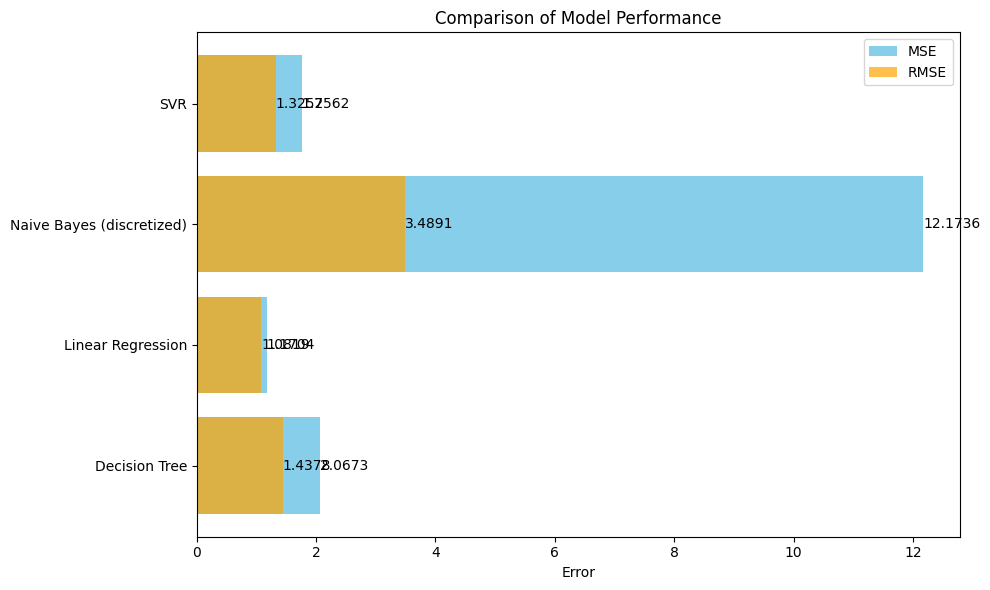

In [33]:
import matplotlib.pyplot as plt

# Define the names and results for each model
model_names = list(models.keys())
mse_values = list(mse_results.values())
rmse_values = list(rmse_results.values())

# Plotting
plt.figure(figsize=(10, 6))

# Plot MSE
plt.barh(model_names, mse_values, color='skyblue', label='MSE')
for i, v in enumerate(mse_values):
    plt.text(v, i, f'{v:.4f}', va='center')

# Plot RMSE
plt.barh(model_names, rmse_values, color='orange', label='RMSE', alpha=0.7)
for i, v in enumerate(rmse_values):
    plt.text(v, i, f'{v:.4f}', va='center')

plt.xlabel('Error')
plt.title('Comparison of Model Performance')
plt.legend()
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()


## **Model Evaluation Interpretation**

Based on the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) metrics, it is evident that Linear Regression outperforms the other evaluated algorithms for this dataset. Here's why:

- **Lowest Error Values**: Linear Regression has the lowest MSE and RMSE values among the evaluated models. This indicates that its predictions are the closest to the actual values compared to the other models.

- **Effective Relationship Capture**: The results suggest that the Linear Regression model effectively captures the underlying relationships between the features and the target variable. This ability to model the data more accurately contributes to its superior performance.

In conclusion, the low error values and effective relationship capture make Linear Regression the preferred choice for predictive modeling on this dataset. However, it's essential to consider other factors such as model assumptions, computational efficiency, and interpretability when selecting the final model.


# PART2 : **Language Modeling / Classification**

In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [2]:
train_df = pd.read_csv(r"C:\Users\hp i7 11jin\Downloads\data\twitter_training.csv")
val_df = pd.read_csv(r"C:\Users\hp i7 11jin\Downloads\data\twitter_validation.csv")

In [3]:
train_df.columns = ['ID', 'Entity', 'Sentiment', 'Text']
val_df.columns = ['ID', 'Entity', 'Sentiment', 'Text']

In [4]:
train_df.dropna(subset=['Text'], inplace=True)
val_df.dropna(subset=['Text'], inplace=True)

In [5]:
train_df

,ID,Entity,Sentiment,Text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


## **Preprocessing Pipeline**

In [6]:
def preprocess_text(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove non-word characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    return text

def tokenize(text):
    return word_tokenize(text)

def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]

def lemmatize(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in tokens]

In [7]:
train_df['cleaned_text'] = train_df['Text'].apply(preprocess_text)
val_df['cleaned_text'] = val_df['Text'].apply(preprocess_text)

In [8]:
train_df['tokens'] = train_df['cleaned_text'].apply(tokenize)
val_df['tokens'] = val_df['cleaned_text'].apply(tokenize)

In [9]:
train_df['tokens'] = train_df['tokens'].apply(remove_stopwords)
val_df['tokens'] = val_df['tokens'].apply(remove_stopwords)

In [10]:
train_df['tokens'] = train_df['tokens'].apply(lemmatize)
val_df['tokens'] = val_df['tokens'].apply(lemmatize)

## **Encode Data Vectors**

### Word2Vec

In [11]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
import numpy as np

In [12]:
word2vec_model = Word2Vec(sentences=train_df['tokens'], vector_size=100, window=5, min_count=1, sg=0)

# Function to get word embeddings
def get_word_embedding(tokens, model):
    embeddings = []
    for word in tokens:
        if word in model.wv:
            embeddings.append(model.wv[word])
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(model.vector_size)  # Return zero vector if no embeddings found

# Apply word embeddings
train_word2vec = train_df['tokens'].apply(lambda x: get_word_embedding(x, word2vec_model))
val_word2vec = val_df['tokens'].apply(lambda x: get_word_embedding(x, word2vec_model))


### Bag of Words

In [13]:
vectorizer = CountVectorizer()
train_bow = vectorizer.fit_transform(train_df['cleaned_text'])
val_bow = vectorizer.transform(val_df['cleaned_text'])

### TF-IDF

In [14]:
tfidf_vectorizer = TfidfVectorizer()
train_tfidf = tfidf_vectorizer.fit_transform(train_df['cleaned_text'])
val_tfidf = tfidf_vectorizer.transform(val_df['cleaned_text'])

# **Train Models**

In [15]:
X_train = np.vstack(train_word2vec)
X_val = np.vstack(val_word2vec)

In [16]:
y_train = train_df['Sentiment'].values
y_val = val_df['Sentiment'].values

In [17]:
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

In [28]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_val)

In [29]:
# Calculate accuracy
svm_accuracy = accuracy_score(y_val, svm_pred)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.5465465465465466


In [30]:
print("\nClassification Report for SVM:")
print(classification_report(y_val, svm_pred))


Classification Report for SVM:
              precision    recall  f1-score   support

  Irrelevant       0.49      0.17      0.25       171
    Negative       0.52      0.73      0.61       266
     Neutral       0.56      0.54      0.55       285
    Positive       0.57      0.61      0.59       277

    accuracy                           0.55       999
   macro avg       0.54      0.51      0.50       999
weighted avg       0.54      0.55      0.53       999



In [18]:
# Naive Bayes classifier
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)
naive_bayes_predictions = naive_bayes_classifier.predict(X_val)

In [19]:
naive_bayes_accuracy = accuracy_score(y_val, naive_bayes_predictions)
print("Naive Bayes Accuracy:", naive_bayes_accuracy)

Naive Bayes Accuracy: 0.4794794794794795


In [24]:
print("Classification Report for Naive Bayes:")
print(classification_report(y_val, naive_bayes_predictions))

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

  Irrelevant       0.34      0.42      0.38       171
    Negative       0.51      0.60      0.55       266
     Neutral       0.51      0.49      0.50       285
    Positive       0.53      0.39      0.45       277

    accuracy                           0.48       999
   macro avg       0.47      0.47      0.47       999
weighted avg       0.49      0.48      0.48       999



In [20]:
logistic_regression_classifier = LogisticRegression(max_iter=1000)
logistic_regression_classifier.fit(X_train, y_train)
logistic_regression_predictions = logistic_regression_classifier.predict(X_val)

In [21]:
logistic_regression_accuracy = accuracy_score(y_val, logistic_regression_predictions)
print("Logistic Regression Accuracy:", logistic_regression_accuracy)

Logistic Regression Accuracy: 0.5415415415415415


In [25]:
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_val, logistic_regression_predictions))


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

  Irrelevant       0.51      0.17      0.25       171
    Negative       0.53      0.70      0.61       266
     Neutral       0.54      0.55      0.54       285
    Positive       0.56      0.61      0.58       277

    accuracy                           0.54       999
   macro avg       0.54      0.51      0.50       999
weighted avg       0.54      0.54      0.52       999



In [22]:
adaboost_classifier = AdaBoostClassifier(n_estimators=100)
adaboost_classifier.fit(X_train, y_train)
adaboost_predictions = adaboost_classifier.predict(X_val)

In [23]:
adaboost_accuracy = accuracy_score(y_val, adaboost_predictions)
print("AdaBoost Accuracy:", adaboost_accuracy)

AdaBoost Accuracy: 0.5275275275275275


In [26]:
print("\nClassification Report for AdaBoost:")
print(classification_report(y_val, adaboost_predictions))


Classification Report for AdaBoost:
              precision    recall  f1-score   support

  Irrelevant       0.34      0.17      0.23       171
    Negative       0.54      0.72      0.62       266
     Neutral       0.56      0.52      0.54       285
    Positive       0.54      0.57      0.56       277

    accuracy                           0.53       999
   macro avg       0.49      0.50      0.48       999
weighted avg       0.51      0.53      0.51       999



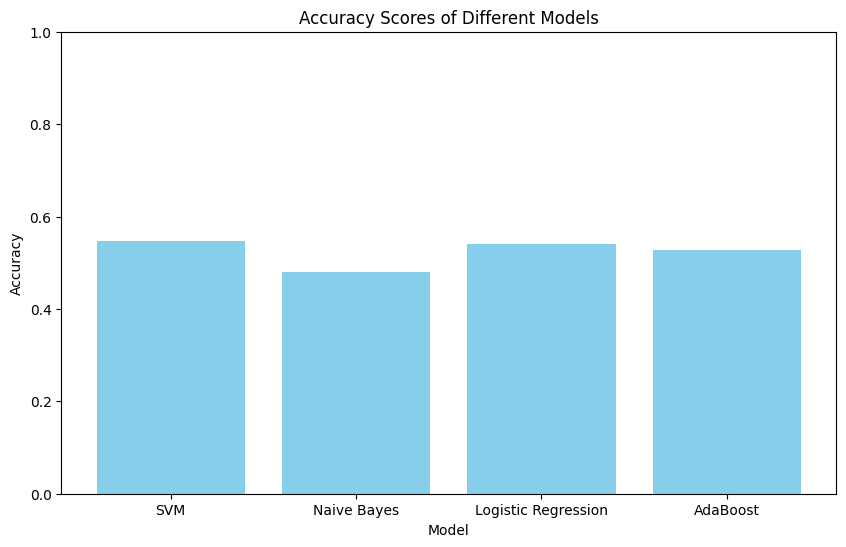

In [31]:
import matplotlib.pyplot as plt

# Assuming you have calculated accuracy scores for each model
models = ['SVM', 'Naive Bayes', 'Logistic Regression', 'AdaBoost']
accuracies = [svm_accuracy, naive_bayes_accuracy, logistic_regression_accuracy, adaboost_accuracy]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.title('Accuracy Scores of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit to range between 0 and 1
plt.show()


## Model Comparison and Interpretation

Logistic Regression and SVM outperform Naive Bayes and AdaBoost in terms of accuracy and overall classification metrics. Despite lower accuracy scores, AdaBoost and Naive Bayes offer valuable insights, particularly in classifying majority classes.

### Key Points:
- **Logistic Regression** and **SVM** exhibit higher accuracy and classification metrics compared to **Naive Bayes** and **AdaBoost**.
- **AdaBoost** and **Naive Bayes** provide valuable insights, particularly in classifying majority classes.
- Consider task-specific requirements and the balance between precision, recall, and accuracy when selecting the best model for deployment.

